![](img/header.png)

# SIG Data & Analytics 15/09/20

# Klim Mikhailov - Machine Learning Practicum

## Machine Learning - "statistics on steroids"

> **"If you torture the data enough, nature will always confess."** – Ronald Coase



![Wikipedia entry](img/wiki.png)

## Scikit-learn

Scikit-learn biedt een groot aantal algoritmen in machine learning die zijn verenigd onder een gemeenschappelijke en intuïtieve API.

* Eenvoudige en efficiënte tools voor datamining en data-analyse
* Toegankelijk voor edereen en herbruikbaar in verschillende contexten
* Gebouwd op _NumPy_, _SciPy_ en _matplotlib_
* Open source, commercieel bruikbaar - BSD-licentie

## [Overzicht van technieken die worden gebruikt bij machine learning](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

![Scikit-learn topic areas](img/sklearn-topics.png)

## Basis Machine Learning algorimen

### Classificatie

Classificatie is een vorm van supervised leren waarbij de doelen voor een voorspelling een reeks categorische waarden zijn.

### Regressie

Regressie is een vorm van supervised leren waarbij de doelen voor een voorspelling kwantitatieve of continue waarden zijn.

### Clustering

Clustering is een vorm van unsupervised leren waarbij je overeenkomsten wilt identificeren tussen verzamelingen items zonder een *voorafgaand* classificatieschema. Je kunt al dan niet een *a priori* hebben over het aantal categorieën.

## Overfitting en Underfitting

- _Overfitting (hoge variance)._ Als we een model nauwkeurig trainen op basis van de gegevens zelf, het is zeer onwaarschijnlijk dat het model zich goed uitbreidt naar nieuwe gegevens. Wordt beperkt door grotere datasets.
- _Underfitting (hoge bias)._ Als we een model kiezen dat weinig mate van detail heeft die nodig is om het onderliggende fenomeen in de echte wereld weer te geven, krijgen we een ondergeschikt model.

![](img/bias-variance.png)

## Onze handen vuil maken

In [1]:
# define necessary libraries
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.simplefilter("ignore")
sklearn.set_config(print_changed_only=False)

We moeten onze gegevens opsplitsen in trainings- en test- sets, en daarbinnen staan veel kolommen met gegevens bekend als *features* en slechts één kolom bekend als het *target*. Het verschil tussen classificatie en regressie is of het terget categorisch of continu is.

<center><img src='img/supervised_workflow.png' width=40%/></center>

## Bekijk altijd eerst je gegevens

> **"80% of the time spent doing data analysis is doing data cleanup."** –Every Data Scientist

In [6]:
import seaborn as sns
df = sns.load_dataset("anscombe")
df.pivot(columns='dataset').describe()

x                                           y             \
dataset          I         II        III         IV          I         II   
count    11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean      9.000000   9.000000   9.000000   9.000000   7.500909   7.500909   
std       3.316625   3.316625   3.316625   3.316625   2.031568   2.031657   
min       4.000000   4.000000   4.000000   8.000000   4.260000   3.100000   
25%       6.500000   6.500000   6.500000   8.000000   6.315000   6.695000   
50%       9.000000   9.000000   9.000000   8.000000   7.580000   8.140000   
75%      11.500000  11.500000  11.500000   8.000000   8.570000   8.950000   
max      14.000000  14.000000  14.000000  19.000000  10.840000   9.260000   

                               
dataset        III         IV  
count    11.000000  11.000000  
mean      7.500000   7.500909  
std       2.030424   2.030579  
min       5.390000   5.250000  
25%       6.250000   6.170000  
50%       7.110000   7.040000  
75%       7.980000   8.190000  
max      12.740000  12.500000

Correlaties van de features zijn identiek:

In [7]:
import numpy as np
df_1 = df[df.dataset=='I']
df_2 = df[df.dataset=='II']
df_3 = df[df.dataset=='III']
df_4 = df[df.dataset=='IV']

(np.corrcoef(df_1.x, df_1.y)[1,0],
 np.corrcoef(df_2.x, df_2.y)[1,0],
 np.corrcoef(df_3.x, df_3.y)[1,0],
 np.corrcoef(df_4.x, df_4.y)[1,0])

(0.8164205163448399,
 0.8162365060002428,
 0.8162867394895984,
 0.8165214368885029)

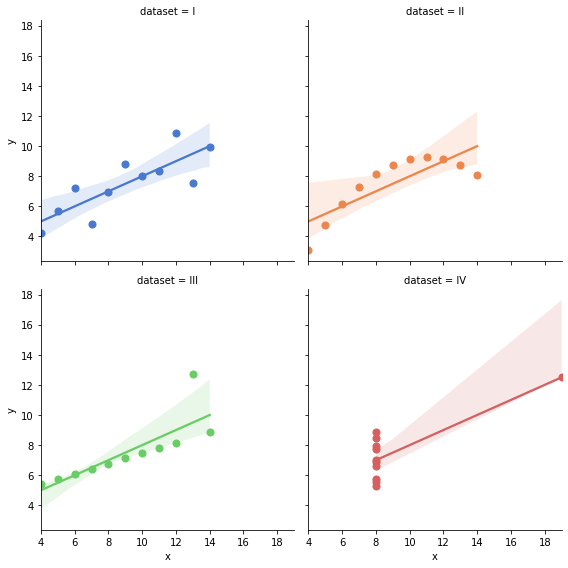

In [8]:
%matplotlib inline
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

### [The Datasaurus](https://www.autodeskresearch.com/publications/samestats)

<center><img src="img/DataDino-600x455.gif" width="50%"/></center>

## Voorbeeldatasets

Een aantal voorbeelddatasets zijn bij scikit-learn inbegrepen, ofwel al gebundeld met een `load_*()` functie voor de kleinere of met een `fetch_*()` functie voor de grotere die online kunnen worden verkregen. De `make_*()` functies creëren synthetische datasets met enige willekeur bij het genereren.

In [9]:
from sklearn import datasets
[attr for attr in dir(datasets) if not attr.startswith('_')]

['clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s_curve',
 'make_sparse_coded_signal',
 'make_sparse_spd_matrix',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll']

## Classificatie

<img src='img/iris.png'/>

De gegevens die we voor dit voorbeeld zullen gebruiken, zijn de Iris-gegevensset, een klassieke gegevensset in machine learning en statistiek. Het is opgenomen in scikit-learn in de datasets-module. We kunnen het laden door de load_iris:

In [10]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [11]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
print(iris_dataset['DESCR'][:1208])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [14]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [16]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [17]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [18]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [19]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [20]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


De betekenissen van de getallen worden gegeven door de `iris['target_names']` array: 0 betekent _setosa_, 1 betekent _versicolor_ en 2 betekent _virginica_.

## Train/Test Split

<center><img src='img/train_test_split_matrix.png' width="50%"/></center>

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [22]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [23]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


## First Things First: kijk naar je gegevens

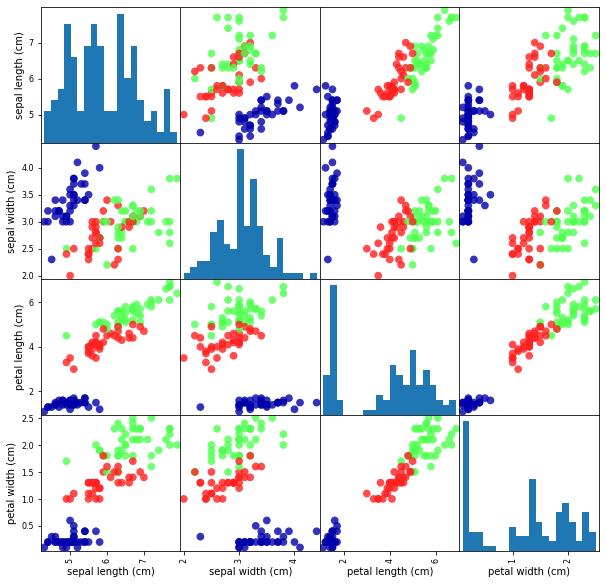

In [24]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10, 10), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

Uit de grafieken kunnen we zien dat de drie klassen relatief goed gescheiden lijken te zijn met behulp van de afmetingen van sepal en petal. Dit betekent dat een machine learning-model waarschijnlijk zal kunnen leren om ze te scheiden.

## Ons eerste model: k-Nearest Neighbors

Om een voorspelling te doen voor een nieuw datapunt, het algoritme zoekt het punt in de trainingsset dat het dichtst bij het nieuwe punt ligt. Vervolgens wijst het het label van dit trainingspunt toe aan het nieuwe datapunt.

In [25]:
# instantiate the Estimator class into an object
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
# build the model on the training dataset
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
# test case
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [28]:
# making predictions
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


## Model evaluatie

In [29]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [30]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [31]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Voor dit model is de nauwkeurigheid van de testset ongeveer 0,97, wat betekent dat we de juiste voorspelling hebben gedaan voor 97% van de irissen in de testset. Onder sommige wiskundige aannames betekent dit dat we kunnen verwachten dat ons model in 97% van de gevallen correct is voor nieuwe irissen.

## Andere metrics

### Classificatietabel (verwarring matrix):

<center><img src=img/confusion-matrix.png width="50%"/></center>

| Predict/Actual | Positive | Negative |
|----------------|----------|----------|
| Positive       |    1     |    0     |
| Negative       |    2     |   997    | 

$$\text{Precision} = \frac{true\: positive}{true\: positive + false\: positive}$$

$$\text{Recall} = \frac{true\: positive}{true\: positive + false\: negative}$$

$$\text{F1} = 2 \times \cfrac{precision \times recall}{precision + recall}$$

## Regressie

Voor een regressie willen we een reeks doelwaarden, geen binaire categorie.

## [Huisvestingsgegevens Californië](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

Een downloadbare dataset zijn de huisvestingsgegevens in Californië. Het dataset heeft als doel de huizenprijs en 8 features. Er zitten 20 duizenden samples in, dus het is redelijk groot van formaat. Dat wil zeggen, het komt nergens in de buurt van de moderne datasets van miljoenen of miljarden waarnemingen waarmee we soms werken; maar het is ook geen speelgoeddataset van tientallen of honderden waarnemingen die vaak worden getoond voor demonstratiedoeleinden.

In [32]:
california = datasets.fetch_california_housing()

In [33]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [34]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [35]:
print("Features:", california.data.shape, california.data.dtype)
print("Target:", california.target.shape, california.target.dtype)

Features: (20640, 8) float64
Target: (20640,) float64


In [36]:
# One DataFrame for everything
df_ca = pd.DataFrame(california.data, columns=california.feature_names)
df_ca['TARGET'] = california.target
df_ca.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Het is altijd de moeite waard om enkele samenvattende statistieken te bekijken voordat we in ons eigenlijke model springen.

In [37]:
df_ca.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Het DataFrame is handig om een idee te krijgen van de gegevens, maar voor scikit-learn zelf willen we gewoon werken met de `.data` en` .target` arrays.

In [38]:
X = california.data
y = california.target

Voor validatie willen we - zoals gewoonlijk - een trein / test-splitsing.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

De metrics die we gebruiken in de onderstaande code zijn explained_variance_score, mean_absolute_error en r2_score:

In [40]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Lineaire modellen

In [41]:
from time import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.svm import LinearSVR

regressors = [
    LinearRegression(), 
    RANSACRegressor(), 
    KNeighborsRegressor(),
    KNeighborsRegressor(n_neighbors=9, metric='manhattan'),
    LinearSVR(),
]

In [42]:
head = 5
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    predictions = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Training time: 0.005s
	Prediction time: 0.001s
	Explained variance: 0.5932507305237855
	Mean absolute error: 0.5351008445282909
	R2 score: 0.5929869285760037

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)
	Training time: 0.104s
	Prediction time: 0.000s
	Explained variance: 0.4844686619629104
	Mean absolute error: 0.5640244917527288
	R2 score: 0.4792496491166487

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
	Training time: 0.062s
	Prediction time: 0.047s
	Explained variance: 0.1333754653693935
	Mean absolute error: 0.8239

## Regularisaties

Een veel voorkomende strategie om de variatie van de lineare aannames te verminderen is om de gewichten (coëfficiënten) die aan elk feature zijn toegewezen, te bestraffen.

Lineare regressie:
$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$

Lasso regressie (L1, dwingen sommige coëfficiënten tot nul):
$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_1$$

Ridge regressie (L2, dempt coëfficiënten):
$$ \text{min}_{w,b}  \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_2^2$$ 

In [43]:
from sklearn.linear_model import Lasso, Ridge

lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

for model in [lr, lasso, ridge]:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Explained variance: 0.5932507305237855
	Mean absolute error: 0.5351008445282909
	R2 score: 0.5929869285760037

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
	Explained variance: 0.28970690474140004
	Mean absolute error: 0.7658634070433789
	R2 score: 0.28887951253541133

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
	Explained variance: 0.5932485147044844
	Mean absolute error: 0.5351099629542905
	R2 score: 0.5929846671576509



## Niet-lineaire regressoren

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(
        california.data, california.target, random_state=1)

regressors = [LinearRegression(),
              DecisionTreeRegressor(max_depth=5),
              DecisionTreeRegressor(max_depth=10),
              DecisionTreeRegressor(max_depth=20),
              RandomForestRegressor(max_depth=10),
              GradientBoostingRegressor(n_estimators=200),
              SVR()]

for model in regressors:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Explained variance: 0.5932507305237855
	Mean absolute error: 0.5351008445282909
	R2 score: 0.5929869285760037

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
	Explained variance: 0.6141535088942047
	Mean absolute error: 0.5179253361670073
	R2 score: 0.614059584091843

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight

 - SVR (met een RBF-kernel) doet het erg slecht
 - De kwaliteit van een decision tree is gevoelig voor de diepte ervan
 - Random forest verbetert decision tree
 - Een `GradientBoostingRegressor` doet het hier het beste, met een kleine marge.

## Hyperparameters verkennen - GridSearchCV

In plaats van geneste loops om meerdere hyperparameters te kunnen testen:

In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(1, 18, 2),
              'weights': ['uniform', 'distance'],
              'metric': ['minkowski', 'manhattan', 'euclidean', 'chebyshev']
             }

grid = GridSearchCV(KNeighborsClassifier(), parameters)
# Best fit over cross-product of parameter space, cross-validated
model = grid.fit(iris_dataset.data, iris_dataset.target)
model

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean',
                                    'chebyshev'],
                         'n_neighbors': range(1, 18, 2),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Identificatie van de beste hyperparameters

In [46]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')
print(model.best_score_)

{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'} 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance') 

0.9866666666666667


## Clustering

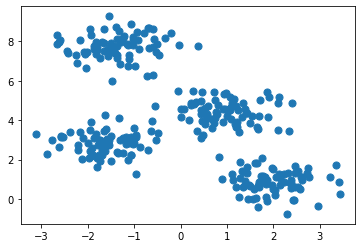

In [47]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

### k-Means:
 - Zet willekeurig sommige clustercentra
 - Herhaal totdat het geconvergeerd is
   - wijs punten toe aan het dichtstbijzijnde clustercentrum
   - stel de clustercentra in op het gemiddelde

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

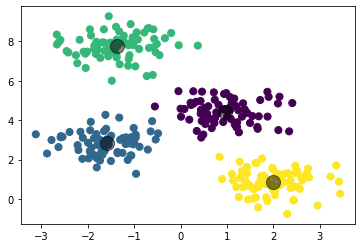

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [50]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

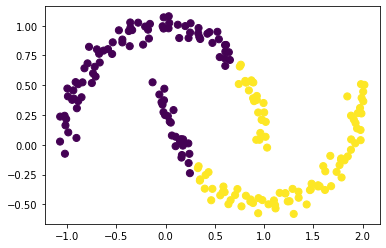

In [51]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

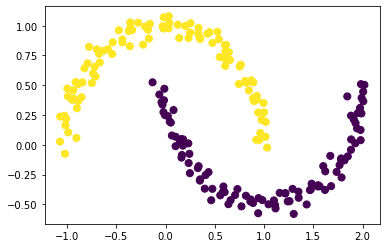

In [52]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

In [53]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [54]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
# Fit several clustering models that take n_clusters
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(boston.data)

models = [cluster.SpectralClustering(n_clusters=4), 
          cluster.KMeans(n_clusters=4), 
          cluster.MiniBatchKMeans(n_clusters=4), 
          cluster.AgglomerativeClustering(n_clusters=4)]

for model in models:
    model.fit(X)
    print(model.__class__.__name__)
    print("\tFirst 5 labels", model.labels_[:5])
    print("\t", len(model.labels_))

SpectralClustering
	First 5 labels [0 0 0 0 0]
	 506
KMeans
	First 5 labels [3 3 3 3 3]
	 506
MiniBatchKMeans
	First 5 labels [3 3 3 3 3]
	 506
AgglomerativeClustering
	First 5 labels [0 0 0 0 0]
	 506


In [56]:
# ... then measure their pairwise similarity
from sklearn import metrics
from itertools import combinations

for clust1, clust2 in combinations(models, 2):
    print(clust1.__class__.__name__, "versus", clust2.__class__.__name__)
    print("\tRand score:", metrics.adjusted_rand_score(clust1.labels_, clust2.labels_))
    print("\tMutual info:", metrics.adjusted_mutual_info_score(clust1.labels_, clust2.labels_))

SpectralClustering versus KMeans
	Rand score: 0.4990756035836968
	Mutual info: 0.6315529106879579
SpectralClustering versus MiniBatchKMeans
	Rand score: 0.34192171711947145
	Mutual info: 0.4141032313754446
SpectralClustering versus AgglomerativeClustering
	Rand score: 0.550129525055905
	Mutual info: 0.72982620072819
KMeans versus MiniBatchKMeans
	Rand score: 0.7250734926080493
	Mutual info: 0.7047986739054143
KMeans versus AgglomerativeClustering
	Rand score: 0.451665961957737
	Mutual info: 0.6157130612846057
MiniBatchKMeans versus AgglomerativeClustering
	Rand score: 0.29384099431255156
	Mutual info: 0.45255165238199024


Beide maatregelen bereikten tussen nul en één. Zoals je zou verwachten, lijken de nauw verwante `KMeans` en `MiniBatchKMeans` sterk op elkaar. Andere paren lijken matig op elkaar; ze lijken zeker veel meer op elkaar dan b.v. willekeurige keuzes van labels, die een score van nul zouden opleveren

## Feature Engineering

### Decomposition

#### Principal component analysis (PCA)

In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [58]:
cancer.data.shape

(569, 30)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, cancer.target, random_state=1)

In [60]:
from sklearn.linear_model import LinearRegression
(LinearRegression()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.7222686011972141

In [61]:
from sklearn.neighbors import KNeighborsClassifier
(KNeighborsClassifier()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.951048951048951

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape: %s" % str(X_scaled.shape))
print("Reduced shape: %s" % str(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [63]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

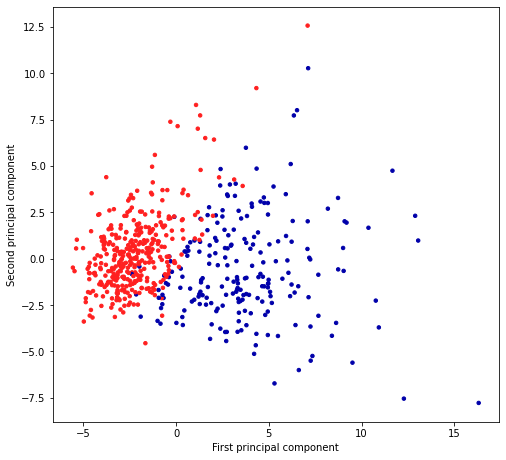

In [116]:
# plot 1st vs 2nd principal component, color by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            c=cancer.target, 
            cmap=mglearn.tools.cm, s=12)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, cancer.target, random_state=1)

In [66]:
(LinearRegression()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.6279864206556378

In [67]:
(KNeighborsClassifier()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.9440559440559441

## Feature uitbreiding

#### Polynoomfeatures

$$ \#Features = N + N + \frac{N \times (N-1)}{2} + 1 $$

In [68]:
cancer = load_breast_cancer()

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(cancer.data)
print(cancer.data.shape)
print(X_poly.shape)

(569, 30)
(569, 496)


In [70]:
poly_names = poly.get_feature_names(cancer.feature_names)
pd.DataFrame(X_poly, columns=poly_names).head()

,1,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst concavity^2,worst concavity worst concave points,worst concavity worst symmetry,worst concavity worst fractal dimension,worst concave points^2,worst concave points worst symmetry,worst concave points worst fractal dimension,worst symmetry^2,worst symmetry worst fractal dimension,worst fractal dimension^2
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.506802,0.188938,0.327545,0.084645,0.070437,0.122111,0.031556,0.211692,0.054706,0.014137
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.058371,0.044938,0.066440,0.021507,0.034596,0.051150,0.016558,0.075625,0.024481,0.007925
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.202860,0.109447,0.162730,0.039446,0.059049,0.087796,0.021282,0.130538,0.031643,0.007670
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.471832,0.176877,0.455964,0.118834,0.066306,0.170928,0.044547,0.440630,0.114837,0.029929
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.160000,0.065000,0.094560,0.030712,0.026406,0.038415,0.012477,0.055885,0.018151,0.005895


#### Hoger dimensies

In [71]:
PolynomialFeatures(3).fit_transform(cancer.data).shape

(569, 5456)

In [72]:
PolynomialFeatures(4).fit_transform(cancer.data).shape

(569, 46376)

### One-Hot Encoding

Features zijn er in een van de drie basistypen:
 - categorisch
 - ordinaal
 - continu

Stel we hebben misschien een functie met een aantal klassewaarden erin gecodeerd. Voor veel modellen is dit ofwel van betere kwaliteit - of gewoon vereist om de code te laten werken - dan proberen om de klasselabels te gebruiken.

In [73]:
pets = pd.read_csv('data/pets.csv')
pets

,species,sex
0,cat,M
1,dog,F
2,fish,M
3,dog,M
4,dog,F
5,cat,M
6,fish,M
7,fish,F


In [74]:
pd.get_dummies(pets)

,species_cat,species_dog,species_fish,sex_F,sex_M
0,1,0,0,0,1
1,0,1,0,1,0
2,0,0,1,0,1
3,0,1,0,0,1
4,0,1,0,1,0
5,1,0,0,0,1
6,0,0,1,0,1
7,0,0,1,1,0


In [75]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(pets)
one_hot_pets = enc.transform(pets)
columns = enc.get_feature_names()
pd.DataFrame(one_hot_pets.toarray(), columns=columns)

,x0_cat,x0_dog,x0_fish,x1_F,x1_M
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,1.0,0.0


### Scaling

In [76]:
rows = 100
test_data = np.empty((rows,4))
test_data[:,0] = np.random.random(rows) * 2 + 1.5 
test_data[:,1] = np.random.randn(rows)
test_data[:,2] = np.random.randint(-50, 25, rows)/10
test_data[:,3] = np.exp(np.random.random(rows)+1.5)
print(test_data[:5])

[[ 1.92888077  0.13551528 -2.2         9.70138817]
 [ 2.24073575 -0.70464787  0.4        10.72557016]
 [ 3.16700488  1.78254636 -0.8        10.8275591 ]
 [ 1.81526853  1.36742047  2.          4.83635256]
 [ 1.80907448 -0.0419404  -0.1         5.25005699]]


In [77]:
pd.DataFrame(test_data).describe().head(3)

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,2.608864,0.071118,-0.950000,7.839251
std,0.561857,0.907489,2.275939,2.335612


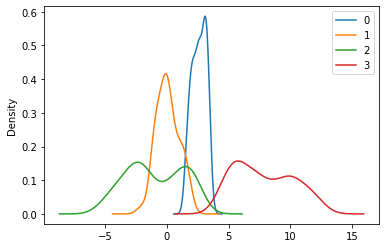

In [78]:
pd.DataFrame(test_data).plot(kind='kde');

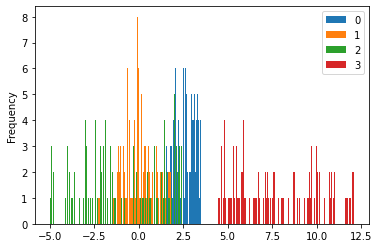

In [79]:
pd.DataFrame(test_data).plot(kind='hist', bins=300);

#### StandardScaler

Standaardiseert features door het gemiddelde te verwijderen en naar eenheidsvariantie te schalen.

In [80]:
from sklearn.preprocessing import StandardScaler
scaled1 = StandardScaler().fit_transform(test_data)
scaled1[:5]

array([[-1.21633885,  0.07131902, -0.55199071,  0.80129649],
       [-0.65849964, -0.85915612,  0.59614997,  1.24201245],
       [ 0.99838987,  1.89539507,  0.06623889,  1.28589933],
       [-1.41956589,  1.43564589,  1.30269808, -1.29217801],
       [-1.43064567, -0.12521198,  0.37535368, -1.11415677]])

In [81]:
pd.DataFrame(scaled1).describe().head(3)

,0,1,2,3
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,7.438494e-17,-4.440892e-17,8.493206e-17,5.573320e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00


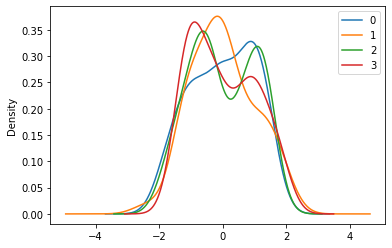

In [82]:
pd.DataFrame(scaled1).plot(kind='kde');

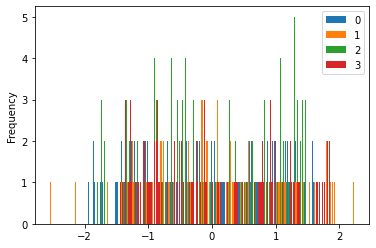

In [83]:
pd.DataFrame(scaled1).plot(kind='hist', bins=300);

#### MinMaxScaler

Transformeert features door elke feature te schalen naar een bepaald bereik, normalite tussen 0 en 1.

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaled3 = MinMaxScaler().fit_transform(test_data)
scaled3[:5]

array([[0.20229175, 0.54768848, 0.37837838, 0.68336065],
       [0.3607597 , 0.35316186, 0.72972973, 0.81758434],
       [0.8314399 , 0.92903273, 0.56756757, 0.83095046],
       [0.14456012, 0.83291683, 0.94594595, 0.04577565],
       [0.14141263, 0.50660139, 0.66216216, 0.09999349]])

In [85]:
pd.DataFrame(scaled3).describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,0.547823,0.532778,0.547297,0.439319
std,0.285506,0.210115,0.307559,0.306093
min,0.000000,0.000000,0.000000,0.000000
25%,0.308744,0.372859,0.293919,0.166696
50%,0.560419,0.510638,0.472973,0.392052
75%,0.801468,0.669998,0.854730,0.708808
max,1.000000,1.000000,1.000000,1.000000


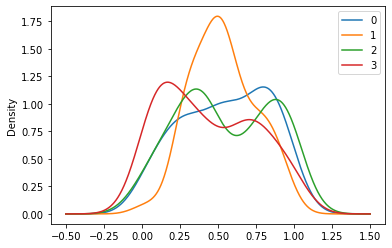

In [86]:
pd.DataFrame(scaled3).plot(kind='kde');

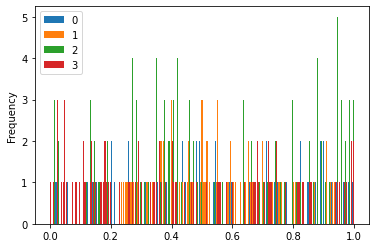

In [87]:
pd.DataFrame(scaled3).plot(kind='hist', bins=300);

## Featureselectie

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(cancer.data, cancer.target)
cancer.data.shape, X_new.shape

((569, 30), (569, 5))

In [89]:
kbest = pd.Series(selector.scores_, index=cancer.feature_names).sort_values(ascending=False)
kbest.head(10)

worst area         112598.431564
mean area           53991.655924
area error           8758.504705
worst perimeter      3665.035416
mean perimeter       2011.102864
worst radius          491.689157
mean radius           266.104917
perimeter error       250.571896
worst texture         174.449400
mean texture           93.897508
dtype: float64

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
lr, knn = LinearRegression(), KNeighborsClassifier()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1)
print("Fit raw features:")
print(" LR:", lr.fit(X_train, y_train).score(X_test, y_test))
print("KNN:", knn.fit(X_train, y_train).score(X_test, y_test))

Fit raw features:
 LR: 0.7222686011972139
KNN: 0.9370629370629371


We doen het slechter met slechts vijf van de dertig features, maar voor KNN niet veel slechter!

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, cancer.target, random_state=1)
print("Fit selected features:")
print(" LR:", lr.fit(X_train, y_train).score(X_test, y_test))
print("KNN:", knn.fit(X_train, y_train).score(X_test, y_test))

Fit selected features:
 LR: 0.5857835011372032
KNN: 0.9230769230769231


## Cross validation

<center><img src="img/KFold.png" width="66%"/></center>

In [93]:
# As we mentioned, the Iris dataset is quite easy to fit
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris_dataset.data, iris_dataset.target, cv=5)
scores    

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [94]:
# Bad split (n_labels = 3)!
from sklearn.model_selection import GroupKFold
cross_val_score(clf, iris_dataset.data, iris_dataset.target, 
                cv=GroupKFold(n_splits=3), groups=iris_dataset.target)

array([0., 0., 0.])

In [95]:
from sklearn.model_selection import KFold
cross_val_score(clf, iris_dataset.data, iris_dataset.target, cv=KFold(n_splits=3))

array([0., 0., 0.])

In [96]:
from sklearn.model_selection import LeaveOneOut
loo_cv = cross_val_score(clf, iris_dataset.data, iris_dataset.target, cv=LeaveOneOut())
print("Mean leave-one-out cross validation:", np.mean(loo_cv))
print("All scores:\n", loo_cv)

Mean leave-one-out cross validation: 0.98
All scores:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## Pipelines

<center><img src="img/pipeline-diagram.png" alt="Pipeline Illustration" width="75%"/></center>

Image credit (CC-BY-NA): [Karl Rosaen](http://karlrosaen.com/ml/learning-log/2016-06-20/)

### Gegevens laden

In [97]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# From here on, we refer to features and target by the
# generic X, y rather than tie it to the dataset
X, y = cancer.data, cancer.target
X.shape

(569, 30)

### Synthetische features genereren

In [98]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly.shape

(569, 496)

### Schaal de gegevens

In [99]:
from sklearn.preprocessing import MinMaxScaler

# compute minimum and maximum on the training data
scaler = MinMaxScaler()
scaler.fit(X_poly)
# rescale training data
X_poly_scaled = scaler.transform(X_poly)
X_poly_scaled.shape

(569, 496)

### Selecteer de belangrijkste features

In [100]:
from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=20)
select.fit(X_poly_scaled, y)
X_selected = select.transform(X_poly_scaled)
X_selected.shape

(569, 99)

### Testen nieuwe features

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=7, random_state=1)

In [102]:
from sklearn.metrics import f1_score, make_scorer
scorer = make_scorer(f1_score)

from sklearn.model_selection import KFold
kf = KFold(5, random_state=0)

In [103]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfc, X_selected, y, scoring=scorer, cv=kf)
print(" CV scores:", cv_scores)
print("Mean score:", np.mean(cv_scores))

 CV scores: [0.92929293 0.98461538 0.98013245 0.99408284 0.98245614]
Mean score: 0.9741159489654005


In [104]:
cv_scores = cross_val_score(rfc, X, y, scoring=scorer, cv=kf)
print("Raw data CV scores:", cv_scores)
print("    Raw mean score:", np.mean(cv_scores))

Raw data CV scores: [0.89795918 0.94573643 0.98666667 0.9704142  0.98245614]
    Raw mean score: 0.9566465251965944


### Hetzelfde met pipelines

In [105]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("Polynomial features", PolynomialFeatures(2)),
    ("MinMax scaling", MinMaxScaler()),
    ("Top 20% features", SelectPercentile(percentile=20)),
    ("Random Forest", RandomForestClassifier(max_depth=7)),
])

In [106]:
cv_scores = cross_val_score(pipe, 
                            X, y, 
                            scoring=make_scorer(f1_score), 
                            cv=KFold(5))

print(" Pipeline CV scores:", cv_scores)
print("Pipeline mean score:", np.mean(cv_scores))

 Pipeline CV scores: [0.92929293 0.98461538 0.98666667 0.98809524 0.98245614]
Pipeline mean score: 0.9742252718042191


In [107]:
pipe.steps

[('Polynomial features',
  PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                     order='C')),
 ('MinMax scaling', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('Top 20% features',
  SelectPercentile(percentile=20,
                   score_func=<function f_classif at 0x000001460C423558>)),
 ('Random Forest',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=7, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False))]

In [108]:
# We can serialize the pipeline for later use
# from pickle import dump, load
# dump(pipe, open('data/cancer-pipeline.pkl','wb'))

In [109]:
# newpipe = load(open('data/cancer-pipeline.pkl','rb'))
# cv_scores = cross_val_score(newpipe, 
#                             X, y, 
#                             scoring=make_scorer(f1_score), 
#                             cv=KFold(5))

# print(" Pipeline CV scores:", cv_scores)
# print("Pipeline mean score:", np.mean(cv_scores))

In [110]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('Polynomial features',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('MinMax scaling',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('Top 20% features',
                 SelectPercentile(percentile=20,
                                  score_func=<function f_classif at 0x000001460C423558>)),
                ('Random Forest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=7, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf

In [111]:
#pipe.predict(X)

### Op een andere manier

In [112]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    PolynomialFeatures(2),
    MinMaxScaler(),
    SelectPercentile(percentile=20),
    RandomForestClassifier(max_depth=7))
pipe.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                     order='C')),
 ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('selectpercentile',
  SelectPercentile(percentile=20,
                   score_func=<function f_classif at 0x000001460C423558>)),
 ('randomforestclassifier',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=7, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False))]

## Pipelines met Grid Search

In [113]:
%%time
# Takes about a minute for this grid search
from sklearn.model_selection import GridSearchCV

params = {'polynomialfeatures__degree': [1, 2, 3],
          'selectpercentile__percentile': [10, 15, 20, 50],
          'randomforestclassifier__max_depth': [5, 7, 9],
          'randomforestclassifier__criterion': ['entropy', 'gini']}

grid = GridSearchCV(pipe, param_grid=params, cv=5)
grid.fit(X, y)

print("best cross-validation accuracy:", grid.best_score_)
print("best dataset score: ", grid.score(X, y))   # Overfitting against entire dataset
print("best parameters: ", grid.best_params_)

best cross-validation accuracy: 0.9806707033069401
best dataset score:  0.9982425307557118
best parameters:  {'polynomialfeatures__degree': 3, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 5, 'selectpercentile__percentile': 50}
Wall time: 2min 9s


In [114]:
model = grid.best_estimator_
cv_scores = cross_val_score(model, 
                            X, y, 
                            scoring=make_scorer(f1_score), 
                            cv=KFold(5))

print(" Grid CV scores:", cv_scores)
print("Grid mean score:", np.mean(cv_scores))

 Grid CV scores: [0.95833333 0.98461538 0.98013245 0.99408284 0.98837209]
Grid mean score: 0.9811072203079572


In [115]:
model.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                     order='C')),
 ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('selectpercentile',
  SelectPercentile(percentile=50,
                   score_func=<function f_classif at 0x000001460C423558>)),
 ('randomforestclassifier',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='entropy', max_depth=5, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False))]

<center><div><a href="UseCase.ipynb"><img src="img/use-case.png"/></a></div></center>

### Referenties

 - [David Mertz - Machine Learning with scikit-learn](https://www.oreilly.com/library/view/machine-learning-with/9780135474198/)
 - [Jake VanderPlas - Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
 - [Andreas C. Müller, Sarah Guido - Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/)
 - [Aurélien Géron - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
 - [Andreas C. Müller - Advanced Machine Learning with scikit-learn](https://www.oreilly.com/library/view/advanced-machine-learning/9781771374927/)
 - [Scikit-learn documentation](https://scikit-learn.org/stable/)